In [5]:
# Name: Arpan Purkait
# Date: Tue 8 Apr, 2025
# ISI-Kolkata Data Science Internship - 2025

import pandas as pd

In [6]:
df = pd.read_csv("GWB1223.csv")
print(df.head)

<bound method NDFrame.head of              Date  Latitude  Longitude     Tmax     Tmin  Rain
0      2012-01-01      21.5       85.5  28.4500  17.2400   0.0
1      2012-01-02      21.5       85.5  27.2000  17.6800   0.0
2      2012-01-03      21.5       85.5  27.5600  17.5100   0.0
3      2012-01-04      21.5       85.5  25.6300  17.6900   0.0
4      2012-01-05      21.5       85.5  27.8700  18.0000   0.0
...           ...       ...        ...      ...      ...   ...
87655  2023-12-27      25.5       88.5  26.8010  14.3240   0.0
87656  2023-12-28      25.5       88.5  26.5231  14.2974   0.0
87657  2023-12-29      25.5       88.5  26.9411  13.7122   0.0
87658  2023-12-30      25.5       88.5  24.7878  13.9715   0.0
87659  2023-12-31      25.5       88.5  23.4209  13.3619   0.0

[87660 rows x 6 columns]>


In [7]:
# Check how many unique grids
grids = df[['Latitude', 'Longitude']].drop_duplicates()
print("Total grids:", len(grids))
#print(grids.head())

Total grids: 20


In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = df.loc[:,~df.columns.duplicated()] # Duplicated Data cleaning
df['Date'] = pd.to_datetime(df['Date']) # Date time format
print("Missing values: \n",df.isnull().sum())

Missing values: 
 Date         0
Latitude     0
Longitude    0
Tmax         0
Tmin         0
Rain         0
dtype: int64


21.5 85.5


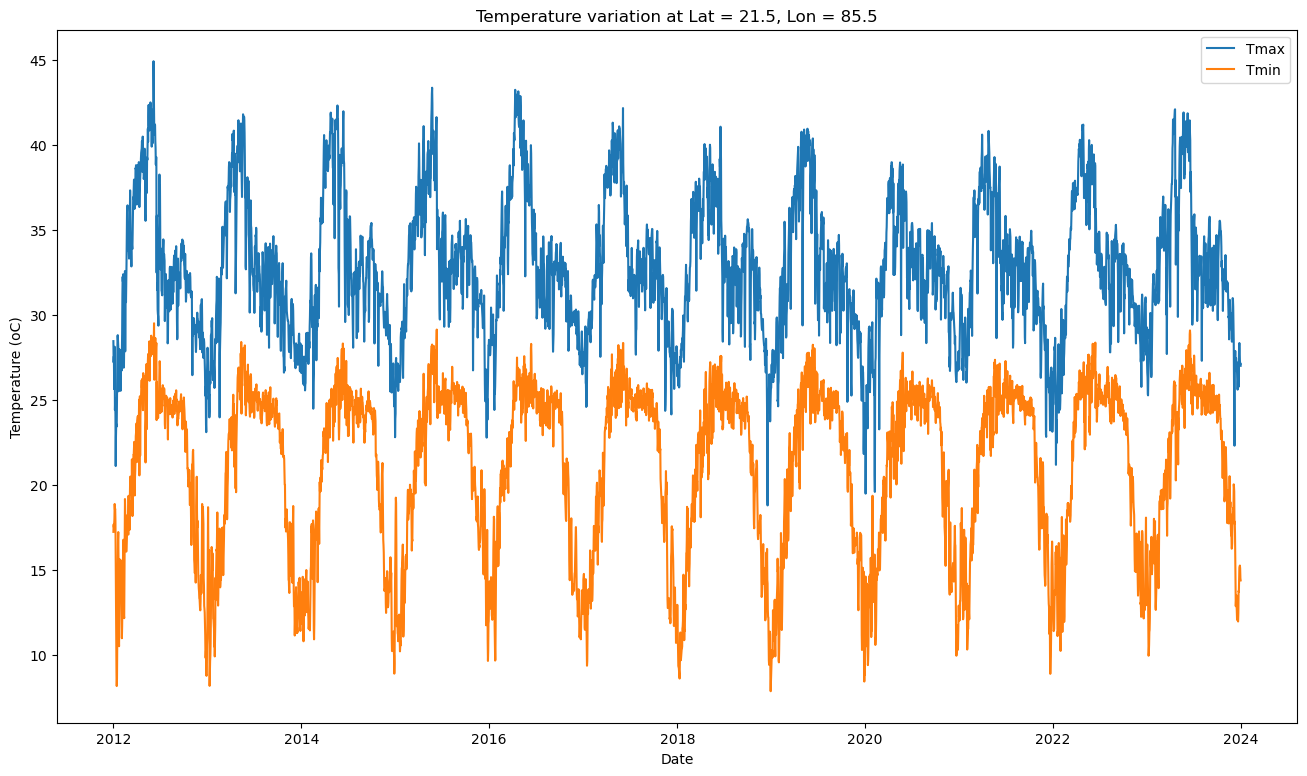

<Figure size 640x480 with 0 Axes>

In [10]:
lat0 = df['Latitude'].iloc[0]
lon0 = df['Longitude'].iloc[0]
print(lat0,lon0)
grid_df = df[(df['Latitude'] == lat0) & (df['Longitude'] == lon0)]
#print(grid_df.head())
plt.figure(figsize=(16,9))
plt.plot(grid_df['Date'],grid_df['Tmax'],label='Tmax')
plt.plot(grid_df['Date'],grid_df['Tmin'],label='Tmin')
plt.title(f"Temperature variation at Lat = {lat0}, Lon = {lon0}")
plt.xlabel('Date')
plt.ylabel('Temperature (oC)')
plt.legend()
plt.show()
plt.savefig("Temp_singleGrid.png",dpi=300)

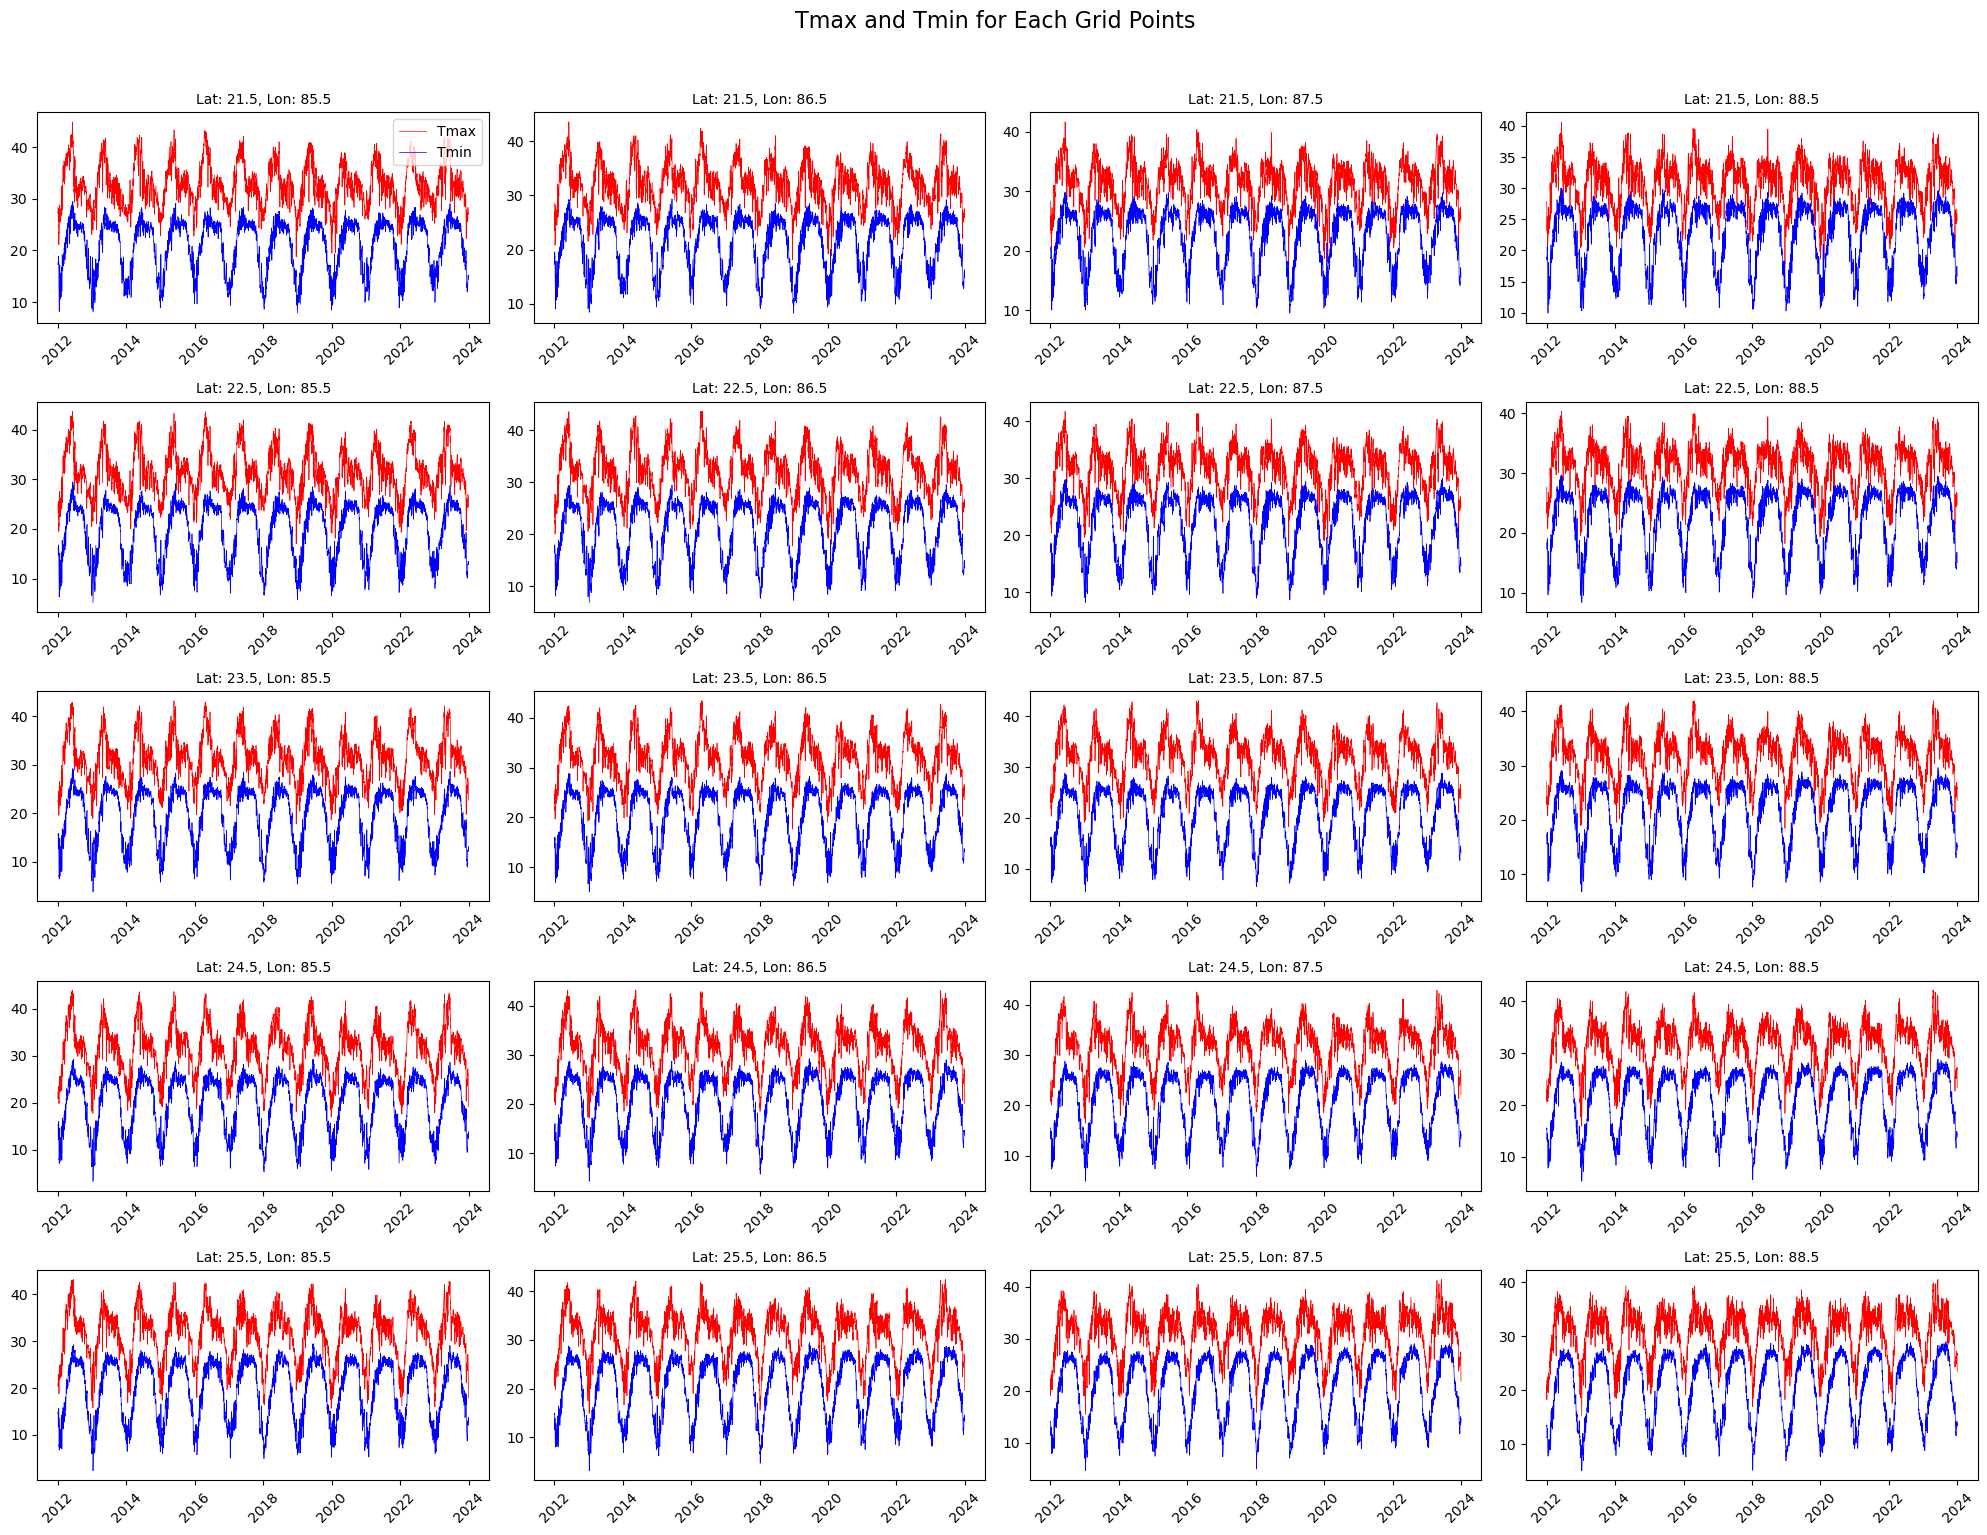

In [11]:
grid_points = df[['Latitude', 'Longitude']].drop_duplicates().values
n = len(grid_points)
rows = 5
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()
for i, (lat, lon) in enumerate(grid_points):
    grid_df = df[(df['Latitude'] == lat) & (df['Longitude'] == lon)]

    axes[i].plot(grid_df['Date'], grid_df['Tmax'], label='Tmax', color='red', linewidth=0.5)
    axes[i].plot(grid_df['Date'], grid_df['Tmin'], label='Tmin', color='blue', linewidth=0.5)
    axes[i].set_title(f'Lat: {lat}, Lon: {lon}', fontsize=10)
    axes[i].tick_params(axis='x', labelrotation=45)
axes[0].legend()

plt.suptitle("Tmax and Tmin for Each Grid Points", fontsize=16, y=1.02)
plt.subplots_adjust(hspace=0.4)
plt.tight_layout()
plt.show()
#plt.savefig("tall_grids.png", dpi=3000)

In [12]:
# Daily Mean
daily_mean = df.groupby('Date')[['Tmax','Tmin','Rain']].mean().reset_index()
daily_mean.to_csv("daily_mean_data.csv",index=False)
print("Saved !")

Saved !


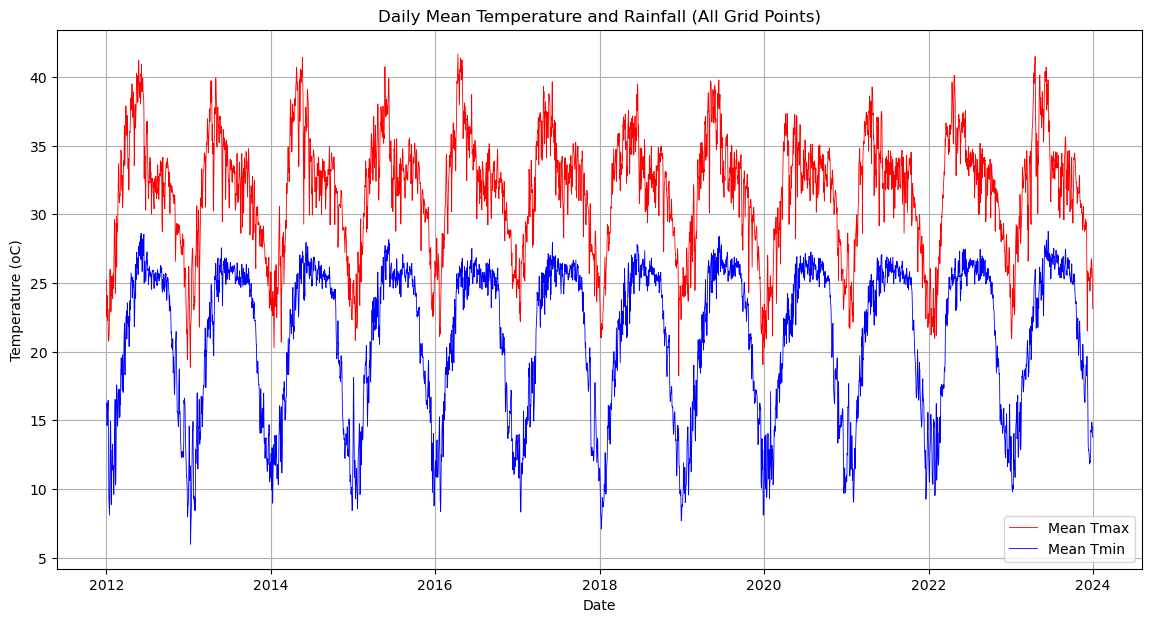

<Figure size 640x480 with 0 Axes>

In [13]:
daily_mean['Date'] = pd.to_datetime(daily_mean['Date'])
plt.figure(figsize=(14, 7))
plt.plot(daily_mean['Date'], daily_mean['Tmax'], label='Mean Tmax', color='red', linewidth=0.6)
plt.plot(daily_mean['Date'], daily_mean['Tmin'], label='Mean Tmin', color='blue', linewidth=0.6)
plt.title("Daily Mean Temperature and Rainfall (All Grid Points)")
plt.xlabel('Date')
plt.ylabel('Temperature (oC)')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("Temp_mean.png",dpi=300)

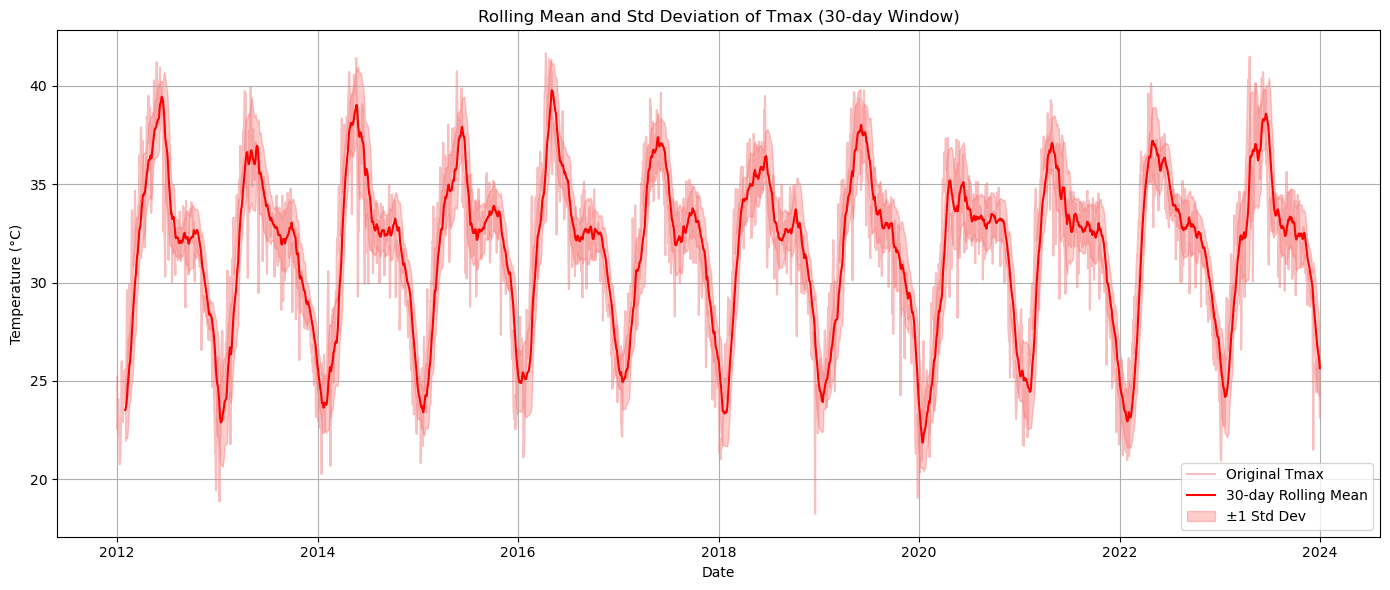

<Figure size 640x480 with 0 Axes>

In [14]:
daily_mean.set_index('Date',inplace=True)
rolling_mean = daily_mean.rolling(window=30).mean()
rolling_std = daily_mean.rolling(window=30).std()
plt.figure(figsize=(14, 6))
# Tmax Rolling Mean and Std
plt.plot(daily_mean.index, daily_mean['Tmax'], label='Original Tmax', color='lightcoral', alpha=0.5)
plt.plot(rolling_mean.index, rolling_mean['Tmax'], label='30-day Rolling Mean', color='red')
plt.fill_between(rolling_std.index,
                 rolling_mean['Tmax'] - rolling_std['Tmax'],
                 rolling_mean['Tmax'] + rolling_std['Tmax'],
                 color='red', alpha=0.2, label='±1 Std Dev')
plt.title('Rolling Mean and Std Deviation of Tmax (30-day Window)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("Temp_rollingMean.png",dpi=300)

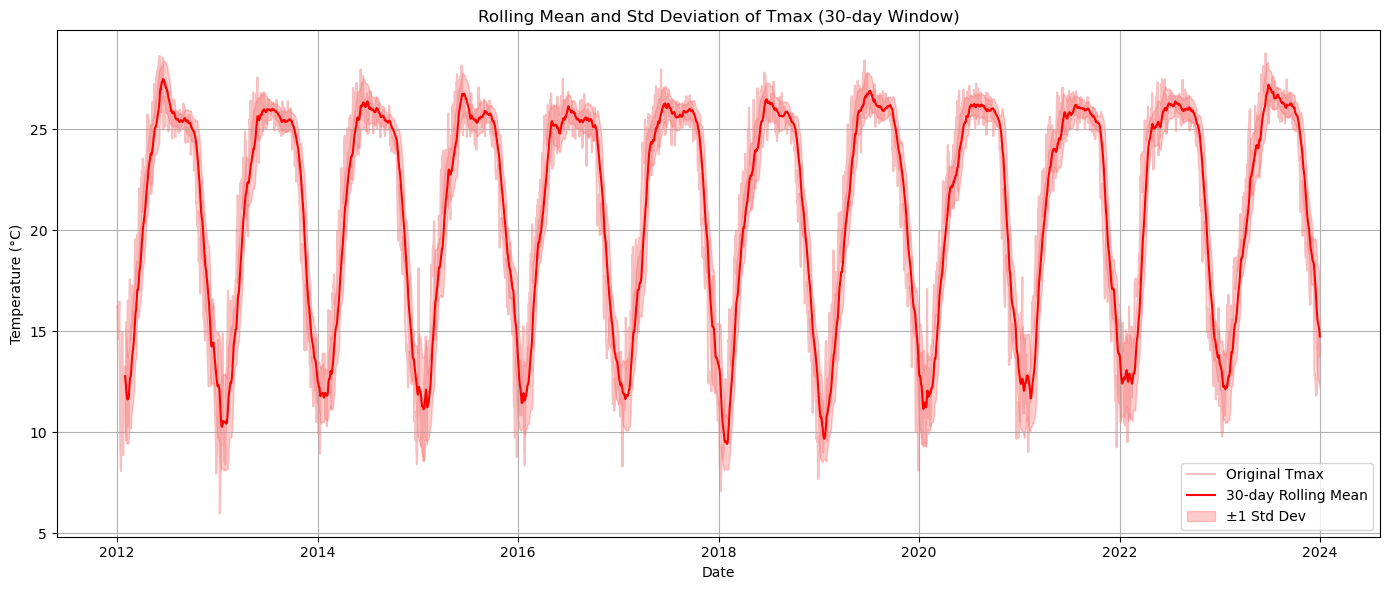

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(14, 6))
# Tmax Rolling Mean and Std
plt.plot(daily_mean.index, daily_mean['Tmin'], label='Original Tmax', color='lightcoral', alpha=0.5)
plt.plot(rolling_mean.index, rolling_mean['Tmin'], label='30-day Rolling Mean', color='red')
plt.fill_between(rolling_std.index,
                 rolling_mean['Tmin'] - rolling_std['Tmin'],
                 rolling_mean['Tmin'] + rolling_std['Tmin'],
                 color='red', alpha=0.2, label='±1 Std Dev')
plt.title('Rolling Mean and Std Deviation of Tmax (30-day Window)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("Temp_rollingMean.png",dpi=300)

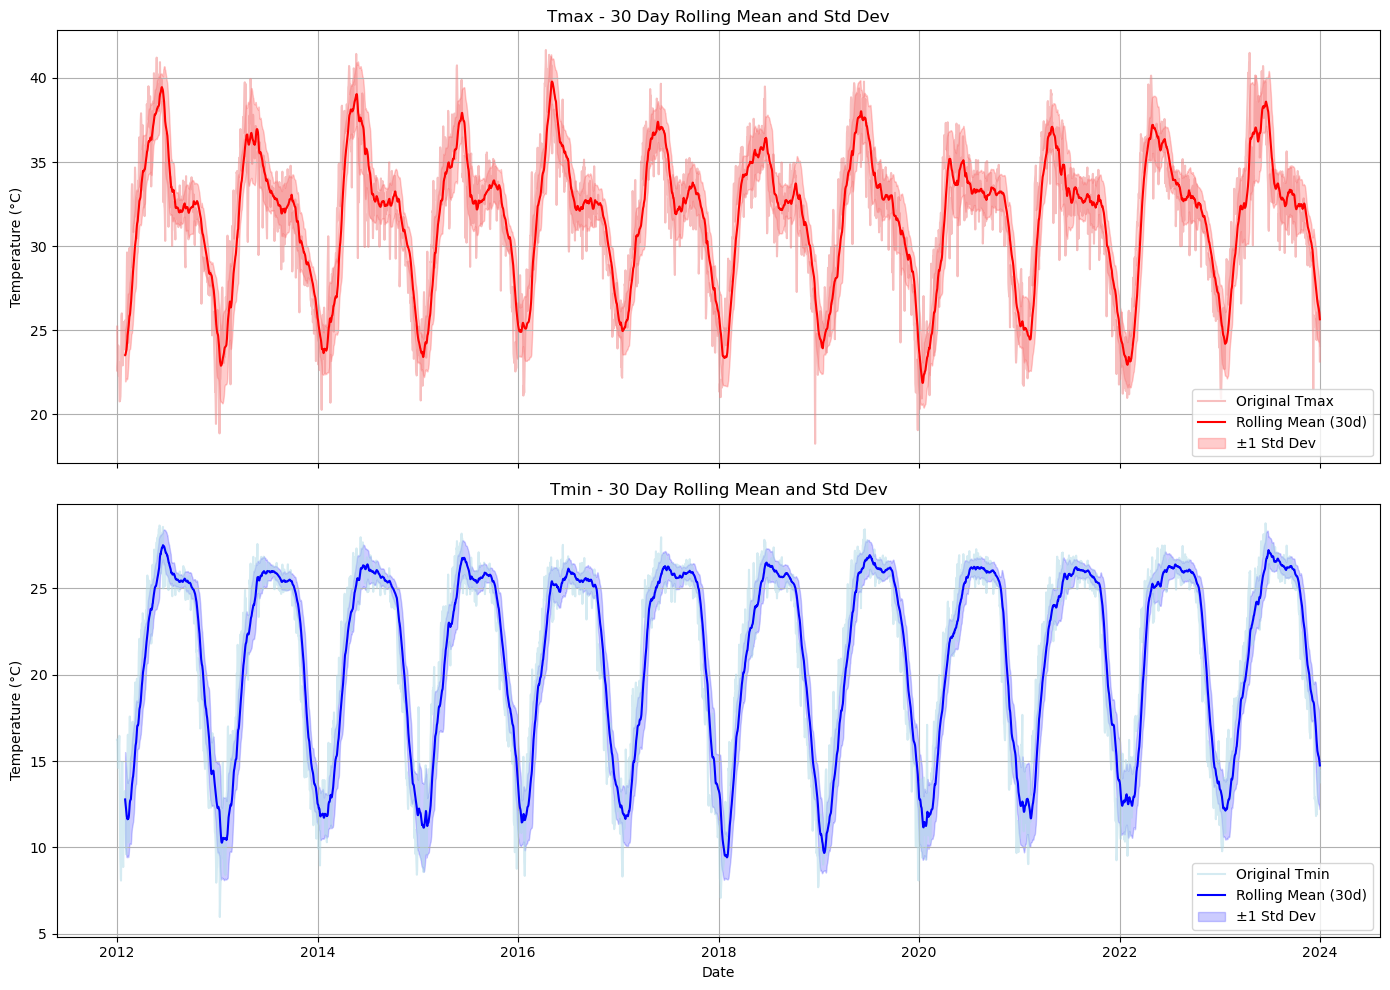

<Figure size 640x480 with 0 Axes>

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

# Plot for Tmax
axes[0].plot(daily_mean.index, daily_mean['Tmax'], label='Original Tmax', color='lightcoral', alpha=0.5)
axes[0].plot(rolling_mean.index, rolling_mean['Tmax'], label='Rolling Mean (30d)', color='red')
axes[0].fill_between(rolling_std.index,
                     rolling_mean['Tmax'] - rolling_std['Tmax'],
                     rolling_mean['Tmax'] + rolling_std['Tmax'],
                     color='red', alpha=0.2, label='±1 Std Dev')
axes[0].set_title("Tmax - 30 Day Rolling Mean and Std Dev")
axes[0].set_ylabel("Temperature (°C)")
axes[0].legend()
axes[0].grid(True)

# Plot for Tmin
axes[1].plot(daily_mean.index, daily_mean['Tmin'], label='Original Tmin', color='lightblue', alpha=0.5)
axes[1].plot(rolling_mean.index, rolling_mean['Tmin'], label='Rolling Mean (30d)', color='blue')
axes[1].fill_between(rolling_std.index,
                     rolling_mean['Tmin'] - rolling_std['Tmin'],
                     rolling_mean['Tmin'] + rolling_std['Tmin'],
                     color='blue', alpha=0.2, label='±1 Std Dev')
axes[1].set_title("Tmin - 30 Day Rolling Mean and Std Dev")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Temperature (°C)")
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()
plt.show()
plt.savefig("Temp_rollingMean.png",dpi=300)

In [17]:
print(daily_mean.head())
# Show all column names
print(daily_mean.columns)

               Tmax     Tmin       Rain
Date                                   
2012-01-01  25.2090  16.2395 -99.140230
2012-01-02  22.5605  16.2610 -96.875585
2012-01-03  22.9210  15.5825 -96.823335
2012-01-04  23.1445  14.6095 -99.596780
2012-01-05  24.0845  14.9475 -99.794065
Index(['Tmax', 'Tmin', 'Rain'], dtype='object')


In [18]:
daily_mean = pd.read_csv("daily_mean_data.csv")
daily_mean['Date'] = pd.to_datetime(daily_mean['Date'], format='%Y-%m-%d')
# Extract year and month as separate columns
daily_mean['Year'] = daily_mean['Date'].dt.year
daily_mean['Month'] = daily_mean['Date'].dt.month
monthly_mean = daily_mean.groupby(['Year', 'Month'])[['Tmax', 'Tmin', 'Rain']].mean().reset_index()
monthly_mean['Date'] = pd.to_datetime(monthly_mean[['Year', 'Month']].assign(DAY=1))
monthly_mean.to_csv("monthly_mean_data.csv", index=False)
print("Saved monthly_mean_data.csv successfully!")

Saved monthly_mean_data.csv successfully!


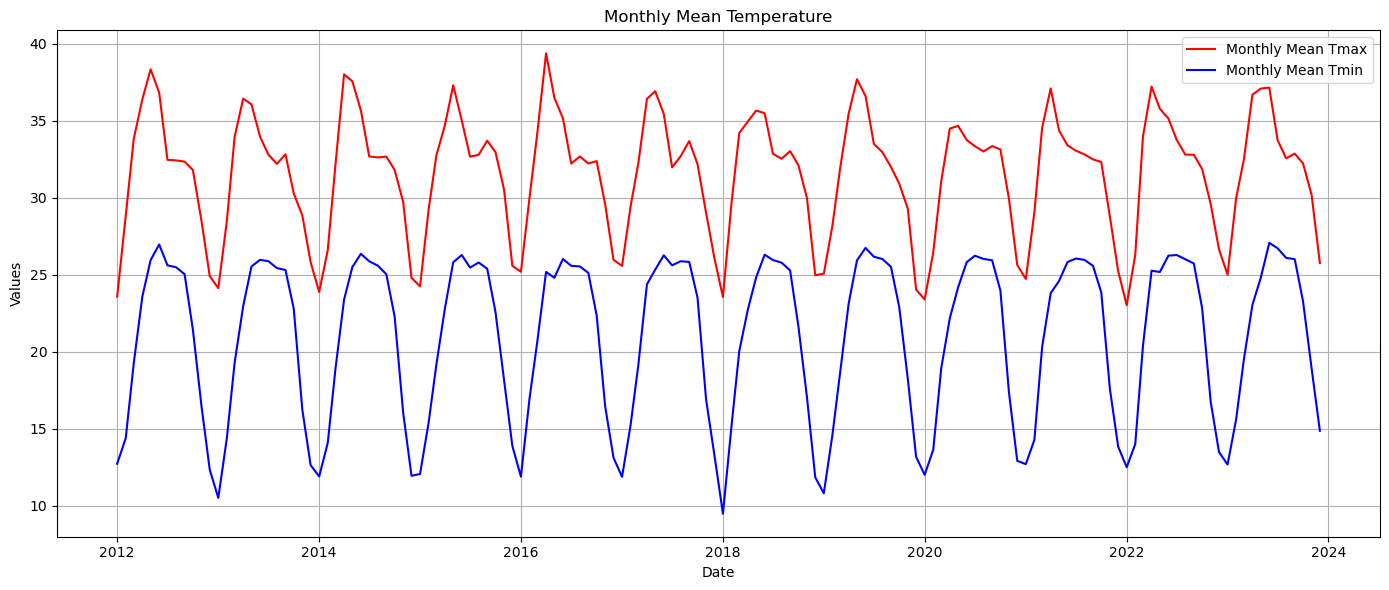

In [19]:
monthly_mean = pd.read_csv("monthly_mean_data.csv")
monthly_mean['Date'] = pd.to_datetime(monthly_mean['Date'])
plt.figure(figsize=(14, 6))
plt.plot(monthly_mean['Date'], monthly_mean['Tmax'], label='Monthly Mean Tmax', color='red')
plt.plot(monthly_mean['Date'], monthly_mean['Tmin'], label='Monthly Mean Tmin', color='blue')
plt.title("Monthly Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [20]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

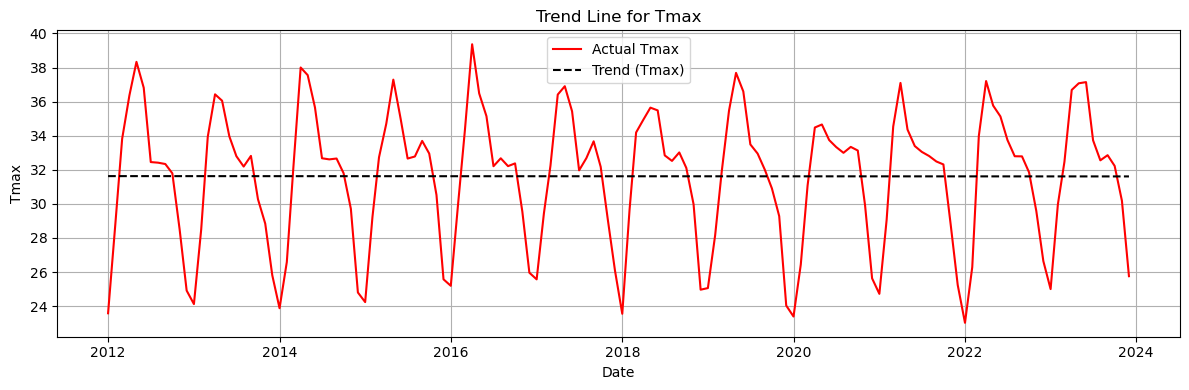

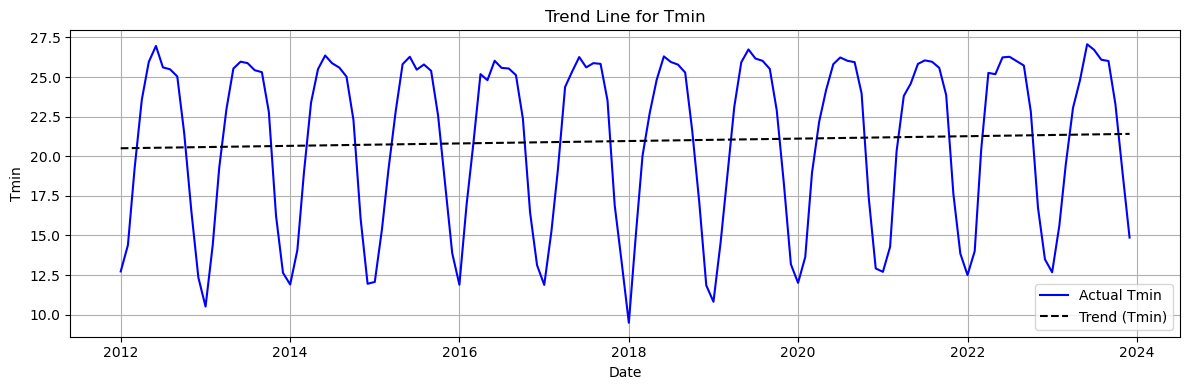

Trend line equation for Tmax: Tmax = -0.00000 * Date + 34.66
Rate of change in Tmax per day: -0.00000 °C
Rate of change in Tmax per year: -0.002 °C/year 
Rate of change in Tmax per decade: -0.015 °C/decade 

Trend line equation for Tmax: Tmin = 0.00021 * Date + -132.52
Rate of change in Tmin per day: 0.00021 °C
Rate of change in Tmin per year: 0.076 °C/year
Rate of change in Tmin per decade: 0.760 °C/decade 



In [21]:
# Convert datetime to numerical format for regression
monthly_mean['Ordinal'] = monthly_mean['Date'].map(pd.Timestamp.toordinal)

# Function to fit and plot regression
def fit_and_plot_trend(y_col, color):
    X = monthly_mean[['Ordinal']]
    y = monthly_mean[y_col]
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.figure(figsize=(12, 4))
    plt.plot(monthly_mean['Date'], y, label=f'Actual {y_col}', color=color)
    plt.plot(monthly_mean['Date'], y_pred, '--', label=f'Trend ({y_col})', color='black')
    plt.title(f"Trend Line for {y_col}")
    plt.xlabel("Date")
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Apply for all 3 variables
fit_and_plot_trend('Tmax', 'red')
fit_and_plot_trend('Tmin', 'blue')
#fit_and_plot_trend('Rain', 'green')

X = monthly_mean[['Ordinal']]
y = monthly_mean['Tmax']
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
print(f"Trend line equation for Tmax: Tmax = {slope:.5f} * Date + {intercept:.2f}")
print(f"Rate of change in Tmax per day: {slope:.5f} °C")
print(f"Rate of change in Tmax per year: {slope*365:.3f} °C/year ")
print(f"Rate of change in Tmax per decade: {slope*365*10:.3f} °C/decade \n")
X = monthly_mean[['Ordinal']]
y = monthly_mean['Tmin']
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
print(f"Trend line equation for Tmax: Tmin = {slope:.5f} * Date + {intercept:.2f}")
print(f"Rate of change in Tmin per day: {slope:.5f} °C")
print(f"Rate of change in Tmin per year: {slope*365:.3f} °C/year")
print(f"Rate of change in Tmin per decade: {slope*365*10:.3f} °C/decade \n")

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

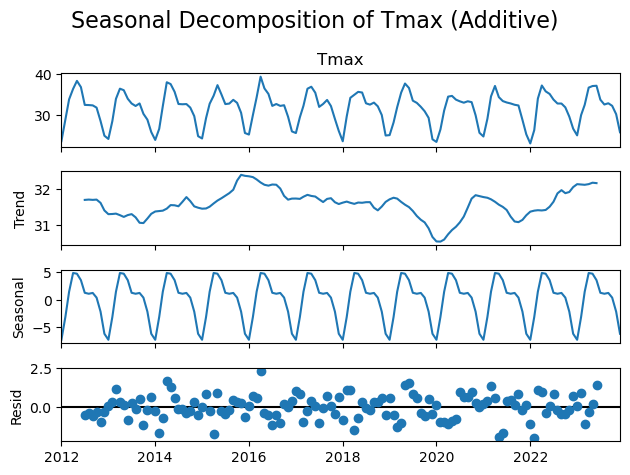

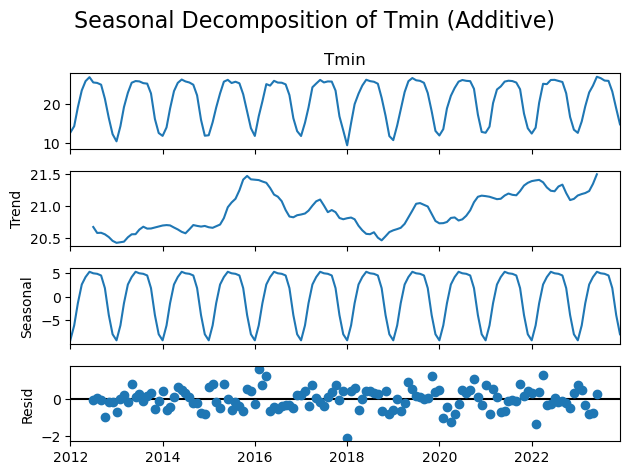

In [23]:
monthly_mean.set_index('Date', inplace=True)

# Decompose Tmax (can repeat for Tmin and Rain)
result = seasonal_decompose(monthly_mean['Tmax'], model='additive', period=12)
result.plot()
plt.suptitle('Seasonal Decomposition of Tmax (Additive)', fontsize=16)
plt.tight_layout()
plt.show()
# Decompose Tmean (can repeat for Tmin and Rain)
result = seasonal_decompose(monthly_mean['Tmin'], model='additive', period=12)
result.plot()
plt.suptitle('Seasonal Decomposition of Tmin (Additive)', fontsize=16)
plt.tight_layout()
plt.show()


#Trend       (slow-moving upward or downward line)
#Seasonality (waves repeating every 12 months)
#Residual    (what’s left – the "randomness")

In [24]:
# World of Time Series Modeling

In [25]:
# ACF: How much does the value at time t correlate with values at t-1, t-2, t-3, ..., up to lag N?
# PACF: How much does value at time t correlate with t-k (lag k), excluding the influence of intermediate lags?

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

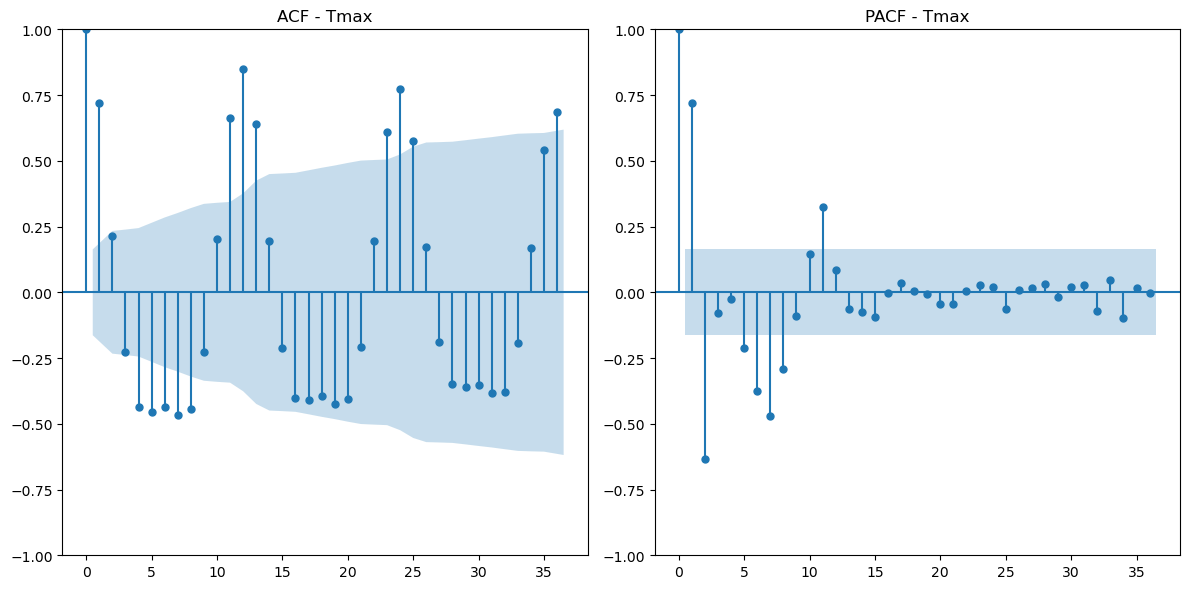

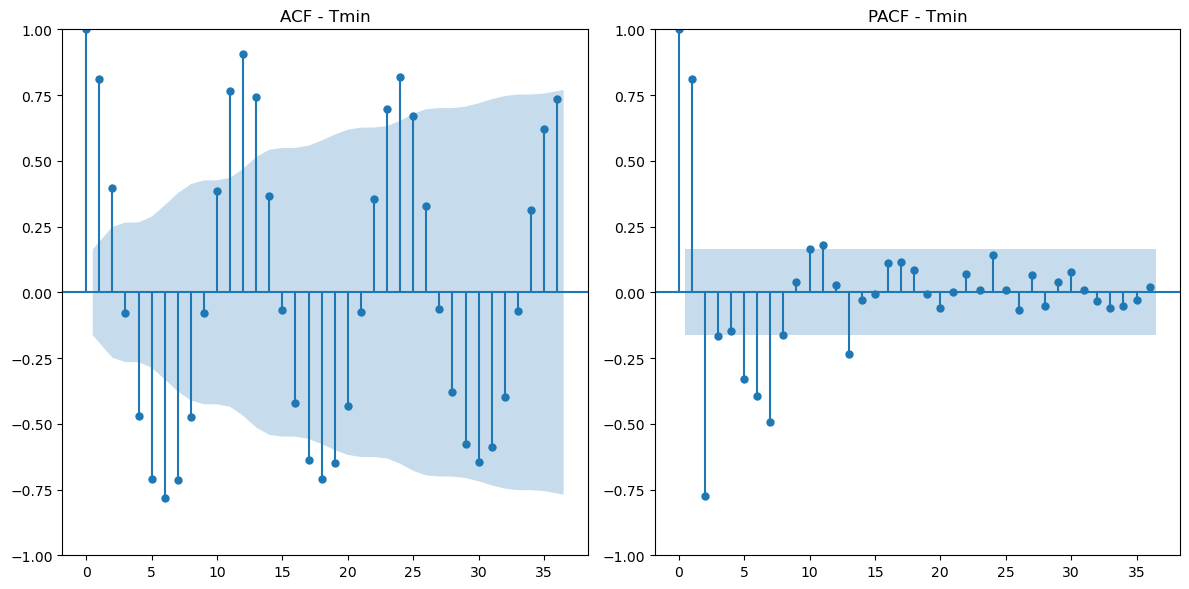

In [27]:
# ACF - PACF Plot for Tmax
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plot_acf(monthly_mean['Tmax'].dropna(), lags=36, ax=plt.gca())
plt.title('ACF - Tmax')
plt.subplot(1, 2, 2)
plot_pacf(monthly_mean['Tmax'].dropna(), lags=36, ax=plt.gca(), method='ywm')
plt.title('PACF - Tmax')
plt.tight_layout()
plt.show()
# ACF - PACF Plot for Tmin
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plot_acf(monthly_mean['Tmin'].dropna(), lags=36, ax=plt.gca())
plt.title('ACF - Tmin')
plt.subplot(1, 2, 2)
plot_pacf(monthly_mean['Tmin'].dropna(), lags=36, ax=plt.gca(), method='ywm')
plt.title('PACF - Tmin')
plt.tight_layout()
plt.show()

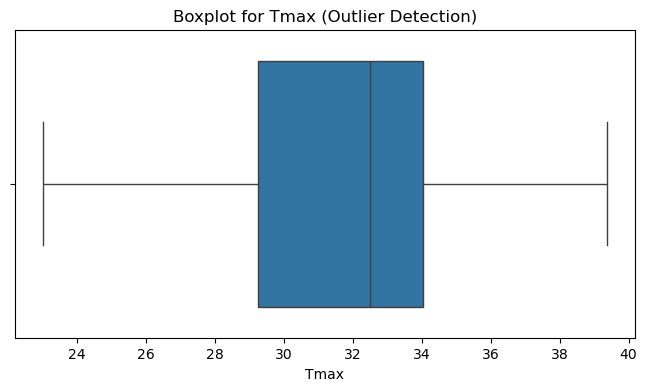

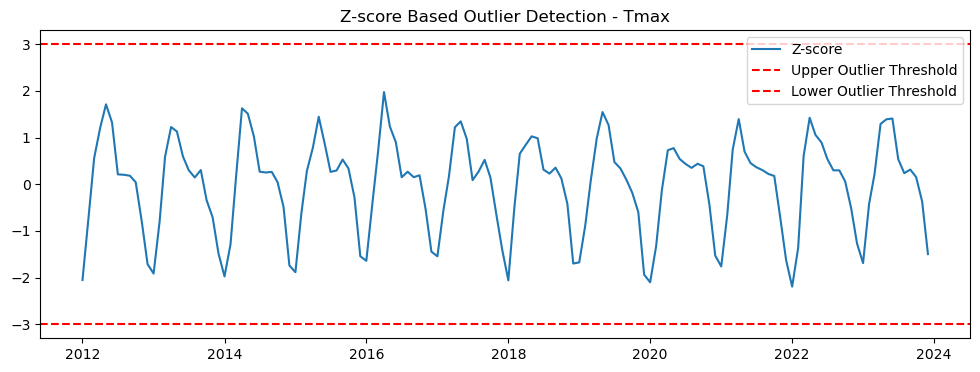

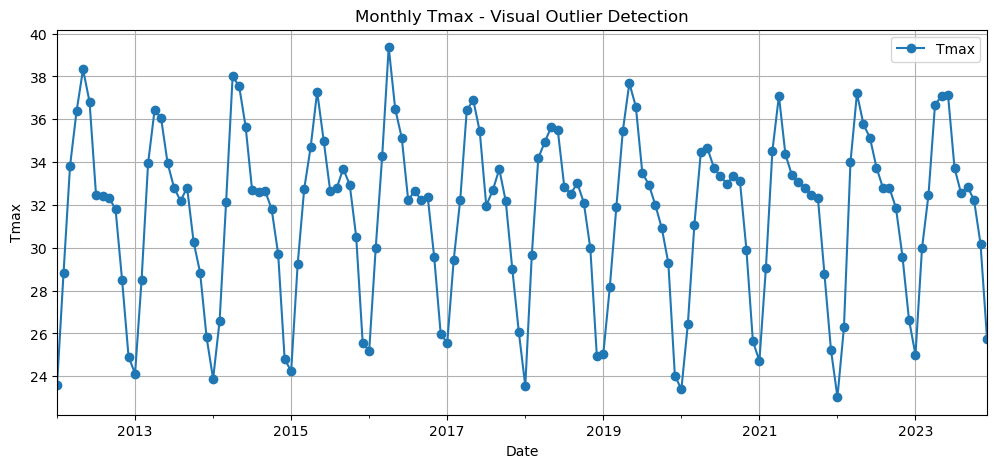

No outlier found in Tmax. 



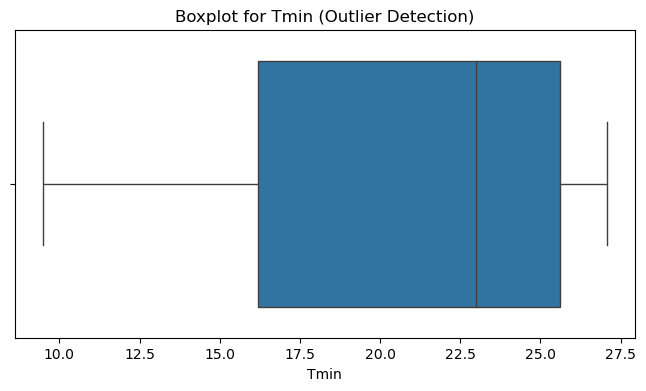

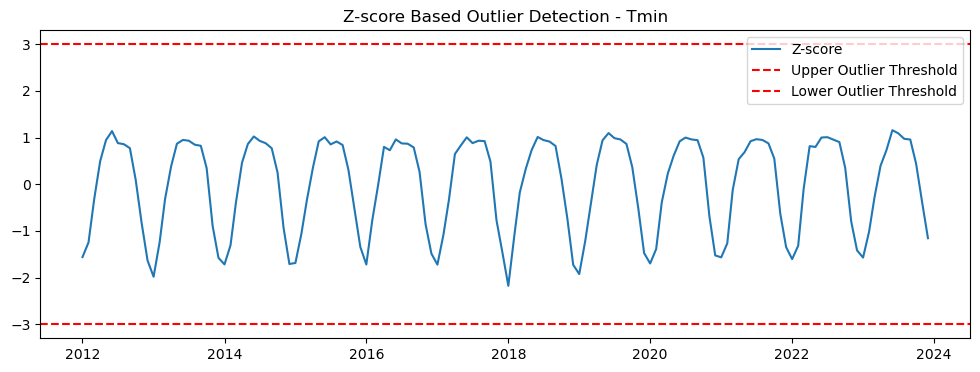

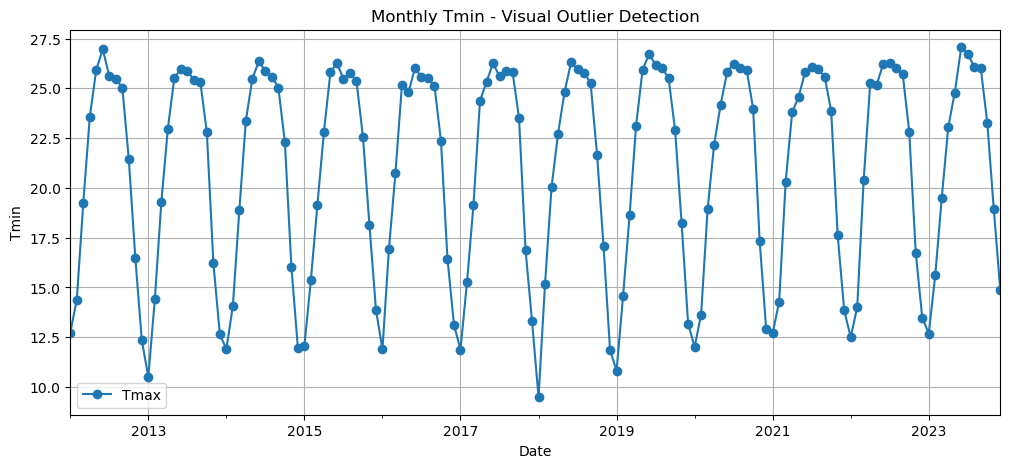

No outlier found in Tmin. 



In [28]:
# Outlier: An outlier is a data point that is very different from the rest
# Z-score: The z-score tells you how many standard deviations a data point is from the mean.
plt.figure(figsize=(8, 4))
sns.boxplot(x=monthly_mean['Tmax'])
plt.title("Boxplot for Tmax (Outlier Detection)")
plt.show()
tmax = monthly_mean['Tmax']
z_scores = (tmax - tmax.mean()) / tmax.std()
plt.figure(figsize=(12,4))
plt.plot(tmax.index, z_scores, label='Z-score')
plt.axhline(3, color='red', linestyle='--', label='Upper Outlier Threshold')
plt.axhline(-3, color='red', linestyle='--', label='Lower Outlier Threshold')
plt.title("Z-score Based Outlier Detection - Tmax")
plt.legend()
plt.show()
# |<-- 0.15% --|<--13.5%--|68%|--13.5%-->|--0.15%-->|
monthly_mean['Tmax'].plot(figsize=(12,5), marker='o', label='Tmax')
plt.title("Monthly Tmax - Visual Outlier Detection")
plt.ylabel("Tmax")
plt.grid(True)
plt.legend()
plt.show()

print("No outlier found in Tmax. \n")
plt.figure(figsize=(8, 4))
sns.boxplot(x=monthly_mean['Tmin'])
plt.title("Boxplot for Tmin (Outlier Detection)")
plt.show()
tmax = monthly_mean['Tmin']
z_scores = (tmax - tmax.mean()) / tmax.std()
plt.figure(figsize=(12,4))
plt.plot(tmax.index, z_scores, label='Z-score')
plt.axhline(3, color='red', linestyle='--', label='Upper Outlier Threshold')
plt.axhline(-3, color='red', linestyle='--', label='Lower Outlier Threshold')
plt.title("Z-score Based Outlier Detection - Tmin")
plt.legend()
plt.show()
# |<-- 0.15% --|<--13.5%--|68%|--13.5%-->|--0.15%-->|
monthly_mean['Tmin'].plot(figsize=(12,5), marker='o', label='Tmax')
plt.title("Monthly Tmin - Visual Outlier Detection")
plt.ylabel("Tmin")
plt.grid(True)
plt.legend()
plt.show()
print("No outlier found in Tmin. \n")

In [29]:
# Ensure Date is datetime
monthly_mean['Date'] = pd.to_datetime(monthly_mean['Date'])

# Extract year and month
monthly_mean['Year'] = monthly_mean['Date'].dt.year
monthly_mean['Month'] = monthly_mean['Date'].dt.month

vmin = min(monthly_mean['Tmax'].min(), monthly_mean['Tmin'].min())
vmax = max(monthly_mean['Tmax'].max(), monthly_mean['Tmin'].max())

# Pivot for Tmax
pivot_tmax = monthly_mean.pivot_table(index='Month', columns='Year', values='Tmax')
plt.figure(figsize=(14,6))
sns.heatmap(pivot_tmax, cmap='coolwarm', annot=False, linewidths=0.5, vmin=vmin, vmax=vmax)
plt.title('Monthly Avg Tmax Heatmap (Common Scale)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

# Pivot for Tmin
pivot_tmin = monthly_mean.pivot_table(index='Month', columns='Year', values='Tmin')
plt.figure(figsize=(14,6))
sns.heatmap(pivot_tmin, cmap='coolwarm', annot=False, linewidths=0.5, vmin=vmin, vmax=vmax)
plt.title('Monthly Avg Tmin Heatmap (Common Scale)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

KeyError: 'Date'

In [ ]:
# Box Plot in time series
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='Tmax', data=monthly_mean, hue='Month',
            palette='Set3', legend=False)
plt.title('Monthly Boxplot of Tmax')
plt.xlabel('Month')
plt.ylabel('Tmax (°C)')
plt.grid(True)
plt.show()
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='Tmin', data=monthly_mean, hue='Month',
            palette='Set3', legend=False)
plt.title('Monthly Boxplot of Tmin')
plt.xlabel('Month')
plt.ylabel('Tmax (°C)')
plt.grid(True)
plt.show()

In [ ]:
# Tmax, Tmin Together (Melt DataFrame)
df_melted = monthly_mean.melt(id_vars=['Date', 'Month'], value_vars=['Tmax', 'Tmin'])
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='value', hue='variable', data=df_melted, palette='Set3')
plt.title('Monthly Boxplot of Tmax and Tmin')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend(title='Variable')
plt.grid(True)
plt.show()

In [ ]:
from pandas.plotting import lag_plot

In [ ]:
lags = [1, 2, 3, 4]  
plt.figure(figsize=(14, 10))

for i, lag in enumerate(lags):
    plt.subplot(2, len(lags), i + 1)
    lag_plot(daily_mean['Tmax'], lag=lag)
    plt.title(f'Tmax Lag {lag}')
    plt.grid(True)
for i, lag in enumerate(lags):
    plt.subplot(2, len(lags), len(lags) + i + 1)
    lag_plot(daily_mean['Tmin'], lag=lag)
    plt.title(f'Tmin Lag {lag}')
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Lag Plots for Tmax and Tmin", fontsize=16, y=1.02)

plt.show()

In [ ]:
lags = [1, 7, 30, 365]  
plt.figure(figsize=(14, 10))

for i, lag in enumerate(lags):
    plt.subplot(2, len(lags), i + 1)
    lag_plot(daily_mean['Tmax'], lag=lag)
    plt.title(f'Tmax Lag {lag}')
    plt.grid(True)
    
for i, lag in enumerate(lags):
    plt.subplot(2, len(lags), len(lags) + i + 1)
    lag_plot(daily_mean['Tmin'], lag=lag)
    plt.title(f'Tmin Lag {lag}')
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Lag Plots for Tmax and Tmin by Daily Data", fontsize=16, y=1.02)

plt.show()

In [ ]:
lags = [1, 3, 6, 12]  
plt.figure(figsize=(14, 10))

for i, lag in enumerate(lags):
    plt.subplot(2, len(lags), i + 1)
    lag_plot(monthly_mean['Tmax'], lag=lag)
    plt.title(f'Tmax Lag {lag}')
    plt.grid(True)
    
for i, lag in enumerate(lags):
    plt.subplot(2, len(lags), len(lags) + i + 1)
    lag_plot(monthly_mean['Tmin'], lag=lag)
    plt.title(f'Tmin Lag {lag}')
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Lag Plots for Tmax and Tmin by Monthly Data", fontsize=16, y=1.02)

plt.show()

In [ ]:
monthly_mean['Month'] = monthly_mean['Month'].astype(str)

plt.figure(figsize=(14, 6))
sns.violinplot(x='Month', y='Tmax', data=monthly_mean, palette='coolwarm', hue='Month', legend=False)
plt.title('Monthly Distribution of Tmax')
plt.xlabel('Month')
plt.ylabel('Tmax (°C)')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
sns.violinplot(x='Month', y='Tmin', data=monthly_mean, palette='coolwarm', hue='Month', legend=False)
plt.title('Monthly Distribution of Tmin')
plt.xlabel('Month')
plt.ylabel('Tmin (°C)')
plt.grid(True)
plt.show()